In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import html5lib
from bs4 import BeautifulSoup
import re
from string import punctuation
import nltk.corpus


In [2]:
nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Twins\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


# Chargement du jeu de données

In [3]:
df = pd.read_csv('QueryResults.csv')

In [4]:
df = df.drop(['FavoriteCount'], axis=1)

In [5]:
df.head()

,Title,Body,Tags,Id,Score,ViewCount,AnswerCount
0,"When porting Java code to ObjC, how best to re...",<p>I am working on porting a Java codebase to ...,<java><objective-c><cocoa><macos><porting>,1117384,8,1346,6
1,Is there a way for hiding some enum values for...,<p>I have <strong>enum</strong> lets say for e...,<c#><.net><winforms><windows-forms-designer><p...,59024032,8,2172,1
2,fixing words with spaces using a dictionary lo...,<p>I have extracted the list of sentences from...,<python><python-2.7><dictionary><nltk><text-se...,19675106,19,6507,7
3,How to split a string at line breaks in python?,<p>I want to copy some tabular data from Excel...,<python><arrays><list><clipboard><pywin32>,21205074,6,7848,5
4,How do you express binary literals in Python?,<p>How do you express an integer as a binary n...,<python><syntax><binary><integer><literals>,1476,394,317942,8


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        50000 non-null  object
 1   Body         50000 non-null  object
 2   Tags         50000 non-null  object
 3   Id           50000 non-null  int64 
 4   Score        50000 non-null  int64 
 5   ViewCount    50000 non-null  int64 
 6   AnswerCount  50000 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 2.7+ MB


On nettoie la colonne Body, en utilisant beautifulsoup

Nettoyage des balises HTML à l'aide de BeautifulSoup

In [7]:
%%time

def clean_html(text_html):
    soup = BeautifulSoup(text_html, "html5lib")
    for element in soup.find_all("code"):
        # print(element)
        element.decompose()
    return soup.get_text().replace("\n", " ")

df['Body_cleaned'] = df['Body'].apply(lambda x : clean_html(x))


CPU times: total: 1min 38s
Wall time: 1min 38s


In [8]:
df.head()

,Title,Body,Tags,Id,Score,ViewCount,AnswerCount,Body_cleaned
0,"When porting Java code to ObjC, how best to re...",<p>I am working on porting a Java codebase to ...,<java><objective-c><cocoa><macos><porting>,1117384,8,1346,6,I am working on porting a Java codebase to Coc...
1,Is there a way for hiding some enum values for...,<p>I have <strong>enum</strong> lets say for e...,<c#><.net><winforms><windows-forms-designer><p...,59024032,8,2172,1,I have enum lets say for example: And have ...
2,fixing words with spaces using a dictionary lo...,<p>I have extracted the list of sentences from...,<python><python-2.7><dictionary><nltk><text-se...,19675106,19,6507,7,I have extracted the list of sentences from a ...
3,How to split a string at line breaks in python?,<p>I want to copy some tabular data from Excel...,<python><arrays><list><clipboard><pywin32>,21205074,6,7848,5,I want to copy some tabular data from Excel in...
4,How do you express binary literals in Python?,<p>How do you express an integer as a binary n...,<python><syntax><binary><integer><literals>,1476,394,317942,8,How do you express an integer as a binary numb...


nettoyage des chevrons dans les tags 

In [9]:
df["Tags_cleaned"] = df["Tags"].str.lower() 
df["Tags_cleaned"] = df["Tags_cleaned"].replace({"><|<|>" : " "}, regex=True)


In [10]:
df.head(20)

,Title,Body,Tags,Id,Score,ViewCount,AnswerCount,Body_cleaned,Tags_cleaned
0,"When porting Java code to ObjC, how best to re...",<p>I am working on porting a Java codebase to ...,<java><objective-c><cocoa><macos><porting>,1117384,8,1346,6,I am working on porting a Java codebase to Coc...,java objective-c cocoa macos porting
1,Is there a way for hiding some enum values for...,<p>I have <strong>enum</strong> lets say for e...,<c#><.net><winforms><windows-forms-designer><p...,59024032,8,2172,1,I have enum lets say for example: And have ...,c# .net winforms windows-forms-designer prope...
2,fixing words with spaces using a dictionary lo...,<p>I have extracted the list of sentences from...,<python><python-2.7><dictionary><nltk><text-se...,19675106,19,6507,7,I have extracted the list of sentences from a ...,python python-2.7 dictionary nltk text-segmen...
3,How to split a string at line breaks in python?,<p>I want to copy some tabular data from Excel...,<python><arrays><list><clipboard><pywin32>,21205074,6,7848,5,I want to copy some tabular data from Excel in...,python arrays list clipboard pywin32
4,How do you express binary literals in Python?,<p>How do you express an integer as a binary n...,<python><syntax><binary><integer><literals>,1476,394,317942,8,How do you express an integer as a binary numb...,python syntax binary integer literals
5,gcc: Strip unused functions,<p>I noticed that sometimes even if I don't us...,<c++><visual-studio><gcc><visual-c++><iostream>,40856787,20,6095,1,I noticed that sometimes even if I don't use ...,c++ visual-studio gcc visual-c++ iostream
6,How do I give my websites an icon for iPhone?,<p>How do I set the icon that appears proper o...,<html><ios><iphone><favicon><apple-touch-icon>,1505,31,8785,1,How do I set the icon that appears proper on t...,html ios iphone favicon apple-touch-icon
7,Absolute email address on Jekyll,<p>I am writing the contact page of my blog. W...,<email><relative-path><jekyll><absolute-path><...,19991198,9,3427,2,I am writing the contact page of my blog. When...,email relative-path jekyll absolute-path emai...
8,Hiding inherited members,<p>I'm looking for some way to effectively hid...,<c#><wpf><silverlight><polymorphism><dependenc...,1528,50,31538,9,I'm looking for some way to effectively hide i...,c# wpf silverlight polymorphism dependency-pr...
9,Linux shell equivalent on IIS,<p>As a LAMP developer considering moving to a...,<windows><iis><shell><command-line><terminal>,1584,21,3322,8,As a LAMP developer considering moving to a .N...,windows iis shell command-line terminal


detection des langues présent  dans le jeu de données 

In [11]:
from langdetect import detect

In [12]:
for index in df.index:
    df.loc[index,'lang'] = detect(df.loc[index,'Body']) 

df['lang'].value_counts()

en    49881
fr       48
ca       33
nl       17
it        6
da        4
pt        3
tl        2
sv        1
et        1
lt        1
hr        1
ro        1
ta        1
Name: lang, dtype: int64

In [13]:
df = df[df['lang']=='en']

# selection des questions selons les tags les plus populaires

 On souhaite travailler sur une sous partie des tags les plus utiliser. Récupérons les 50 tags les plus populaires dans le jeu de données

In [14]:
def  N_most_popular_tags(data, column,N):
    ''' N est le nombre de tags les plus populaire qu'on veut selectionner '''
    list_words = []
    for word in data[column].str.split():
        list_words.extend(word)
    data_list_words = pd.DataFrame(list_words, columns=["Tag"])
    data_list_words = data_list_words.groupby("Tag").agg(tag_count=pd.NamedAgg(column="Tag", aggfunc="count"))
    data_list_words.sort_values("tag_count", ascending=False, inplace=True)
    N_tags = data_list_words.iloc[0:N, :]
    return data_list_words,N_tags

In [15]:
N_popular_tags = N_most_popular_tags(df,'Tags_cleaned',50)

In [16]:
tags_to_keep = N_popular_tags[1].reset_index()
tags_to_keep

,Tag,tag_count
0,c#,6248
1,java,5800
2,javascript,4934
3,python,4841
4,c++,3901
5,.net,3348
6,ios,3327
7,android,3162
8,html,2058
9,php,1955


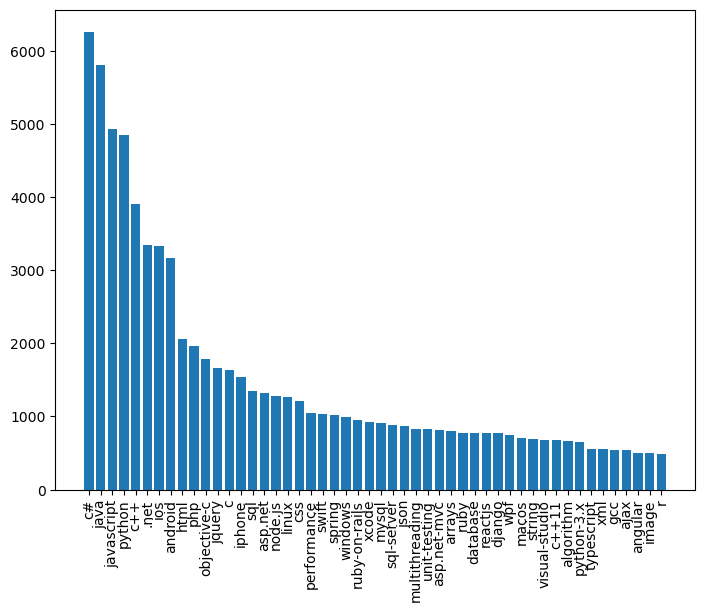

In [108]:
#visualisation des 50 Tags les plus populaires 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(tags_to_keep['Tag'], tags_to_keep['tag_count'])
plt.xticks(rotation=90)
plt.show()

In [17]:
def keep_question_with_selected_tags(x, top_list):
    
    ''' pour selectionner uniquement les tags qui sont présent dans la list des tags les plus populaire (50)'''
    temp_list = []
    for item in x.split():
        if (item in top_list):
             temp_list.append(item)
    return temp_list

In [18]:
df['Tags_list'] = df['Tags_cleaned'].apply(lambda x: keep_question_with_selected_tags(x, tags_to_keep['Tag'].to_list()))
df['number_of_tags'] = df['Tags_list'].apply(lambda x : len(x))
df.head(30)

,Title,Body,Tags,Id,Score,ViewCount,AnswerCount,Body_cleaned,Tags_cleaned,lang,Tags_list,number_of_tags
0,"When porting Java code to ObjC, how best to re...",<p>I am working on porting a Java codebase to ...,<java><objective-c><cocoa><macos><porting>,1117384,8,1346,6,I am working on porting a Java codebase to Coc...,java objective-c cocoa macos porting,en,"[java, objective-c, macos]",3
1,Is there a way for hiding some enum values for...,<p>I have <strong>enum</strong> lets say for e...,<c#><.net><winforms><windows-forms-designer><p...,59024032,8,2172,1,I have enum lets say for example: And have ...,c# .net winforms windows-forms-designer prope...,en,"[c#, .net]",2
2,fixing words with spaces using a dictionary lo...,<p>I have extracted the list of sentences from...,<python><python-2.7><dictionary><nltk><text-se...,19675106,19,6507,7,I have extracted the list of sentences from a ...,python python-2.7 dictionary nltk text-segmen...,en,[python],1
3,How to split a string at line breaks in python?,<p>I want to copy some tabular data from Excel...,<python><arrays><list><clipboard><pywin32>,21205074,6,7848,5,I want to copy some tabular data from Excel in...,python arrays list clipboard pywin32,en,"[python, arrays]",2
4,How do you express binary literals in Python?,<p>How do you express an integer as a binary n...,<python><syntax><binary><integer><literals>,1476,394,317942,8,How do you express an integer as a binary numb...,python syntax binary integer literals,en,[python],1
5,gcc: Strip unused functions,<p>I noticed that sometimes even if I don't us...,<c++><visual-studio><gcc><visual-c++><iostream>,40856787,20,6095,1,I noticed that sometimes even if I don't use ...,c++ visual-studio gcc visual-c++ iostream,en,"[c++, visual-studio, gcc]",3
6,How do I give my websites an icon for iPhone?,<p>How do I set the icon that appears proper o...,<html><ios><iphone><favicon><apple-touch-icon>,1505,31,8785,1,How do I set the icon that appears proper on t...,html ios iphone favicon apple-touch-icon,en,"[html, ios, iphone]",3
7,Absolute email address on Jekyll,<p>I am writing the contact page of my blog. W...,<email><relative-path><jekyll><absolute-path><...,19991198,9,3427,2,I am writing the contact page of my blog. When...,email relative-path jekyll absolute-path emai...,en,[],0
8,Hiding inherited members,<p>I'm looking for some way to effectively hid...,<c#><wpf><silverlight><polymorphism><dependenc...,1528,50,31538,9,I'm looking for some way to effectively hide i...,c# wpf silverlight polymorphism dependency-pr...,en,"[c#, wpf]",2
9,Linux shell equivalent on IIS,<p>As a LAMP developer considering moving to a...,<windows><iis><shell><command-line><terminal>,1584,21,3322,8,As a LAMP developer considering moving to a .N...,windows iis shell command-line terminal,en,[windows],1


In [19]:
df.shape[0]

49881

on ne garde que les questions qui ont au moins 1 tag dans la list des 50 plus populaire tags. 

In [20]:
df = df[df.number_of_tags > 0]
print("New size of dataset : {} questions.".format(df.shape[0]))

New size of dataset : 43808 questions.


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43808 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           43808 non-null  object
 1   Body            43808 non-null  object
 2   Tags            43808 non-null  object
 3   Id              43808 non-null  int64 
 4   Score           43808 non-null  int64 
 5   ViewCount       43808 non-null  int64 
 6   AnswerCount     43808 non-null  int64 
 7   Body_cleaned    43808 non-null  object
 8   Tags_cleaned    43808 non-null  object
 9   lang            43808 non-null  object
 10  Tags_list       43808 non-null  object
 11  number_of_tags  43808 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 4.3+ MB


# pré-traitement de text

## pré-nettoyage classique

In [22]:
stop_words = stopwords.words('english')
my_punctuation = '!"$%&\()*,-./:;<=>?@[\\]^_`{|}~'

In [23]:
def clean_text(text):
    #text lowercase
    text = text.lower()
    #remove punctiation in except + and # for C++ and C#
    text = text.translate(str.maketrans("", "", my_punctuation))
    #remove numbers
    text = re.sub('\d+', '', text)
    # Remove unicode characters
    text = text.encode("ascii", "ignore").decode()
    # Remove extra spaces
    text = re.sub('\s+', ' ', text)
    #tokenization
    #text = text.split()
    #remove_stop_words
    #text = [word for word in text if not word in stop_words]

    
    # stemmer
    
    # lemmatizer
    
    
    return text 

In [24]:
df['Title_cleaned'] = df['Title'].apply(lambda text: clean_text(text))


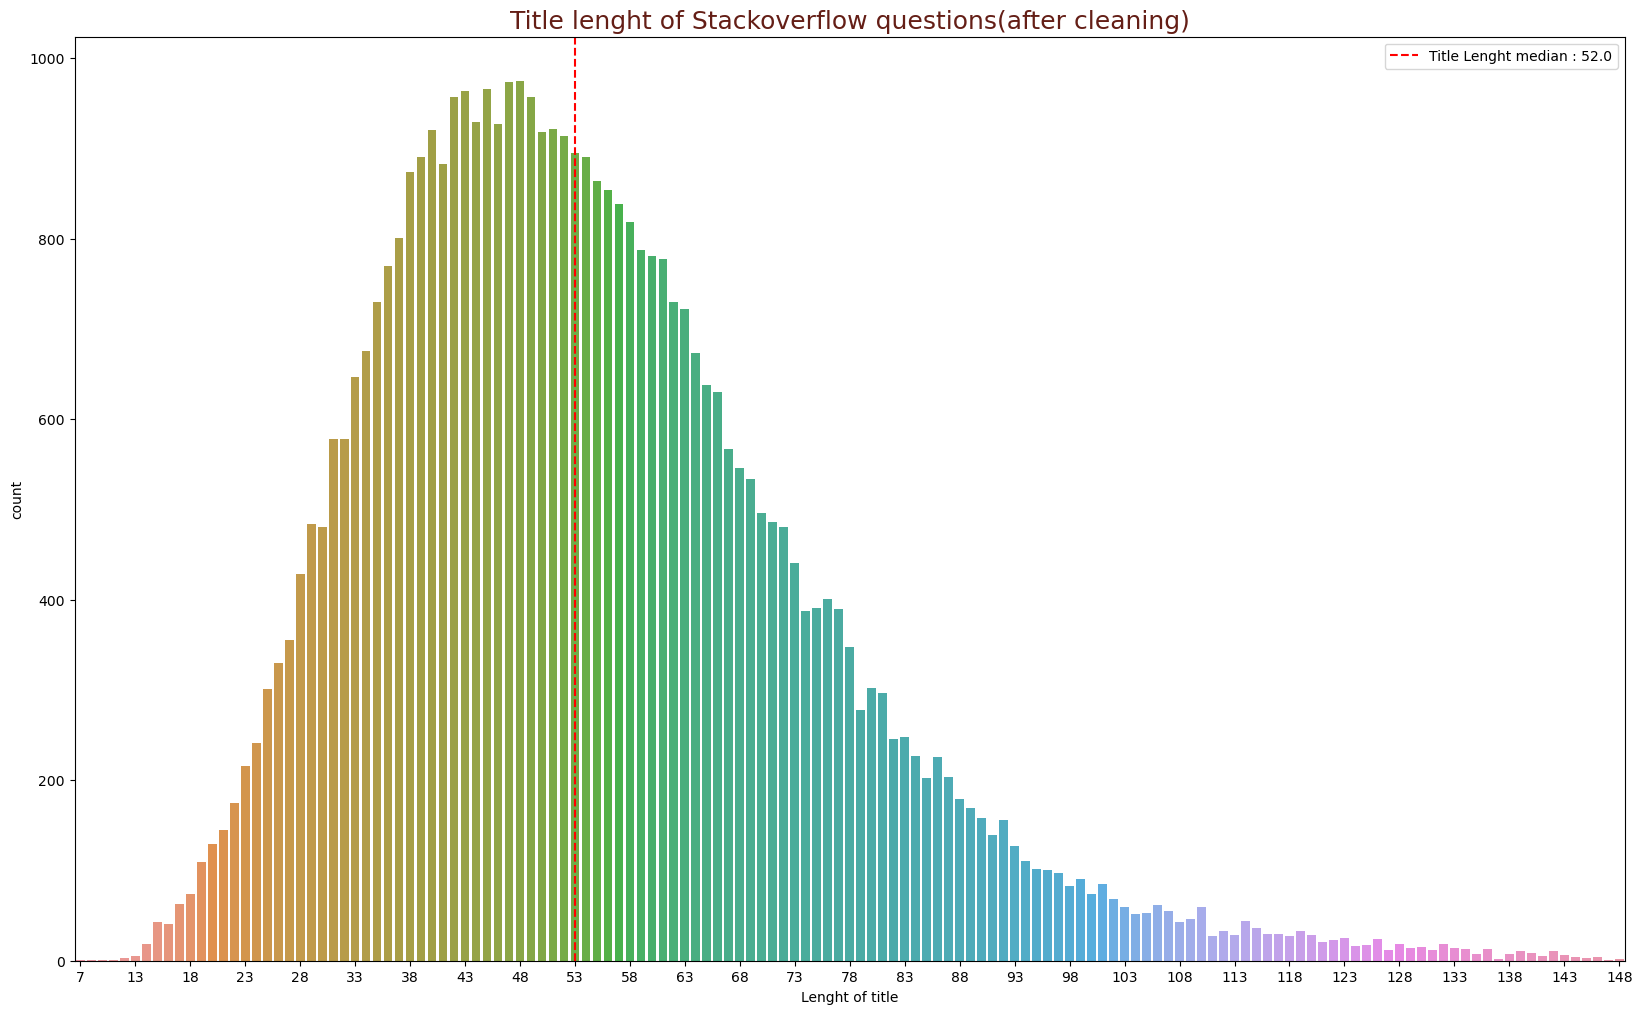

In [27]:
# Longeur des titres

fig = plt.figure(figsize=(20, 12))
ax = sns.countplot(x=df.Title_cleaned.str.len())
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, end, 5))
plt.axvline(df.Title_cleaned.str.len().median() - df.Title_cleaned.str.len().min(),
            color="r", linestyle='--',
            label="Title Lenght median : "+str(df.Title_cleaned.str.len().median()))
ax.set_xlabel("Lenght of title")
plt.title("Title lenght of Stackoverflow questions(after cleaning)",
          fontsize=18, color="#641E16")
plt.legend()
plt.show()

In [28]:
df['Body_cleaned'] = df['Body_cleaned'].apply(lambda text: clean_text(text))

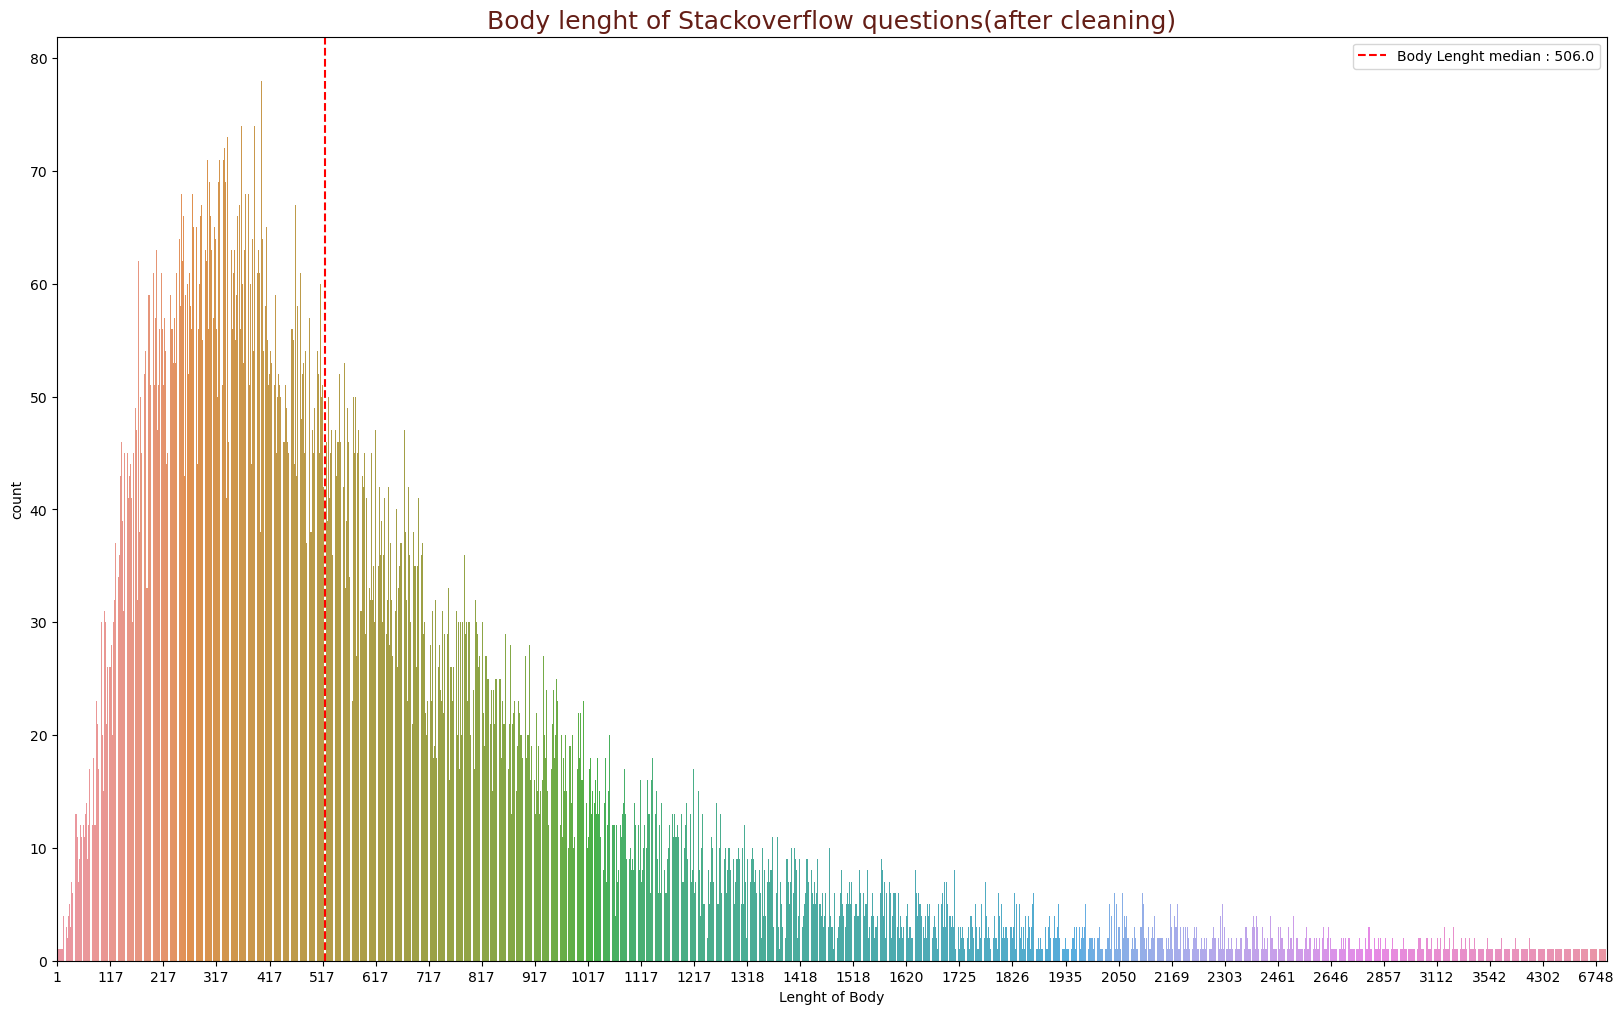

In [109]:
# Longeur des titres

fig = plt.figure(figsize=(20, 12))
ax = sns.countplot(x=df.Body_cleaned.str.len())
start, end = ax.get_xlim()
plt.axvline(df.Body_cleaned.str.len().median() - df.Body_cleaned.str.len().min(),
            color="r", linestyle='--',
            label="Body Lenght median : "+str(df.Body_cleaned.str.len().median()))
ax.xaxis.set_ticks(np.arange(0, end, 100))
ax.set_xlabel("Lenght of Body")
plt.title("Body lenght of Stackoverflow questions(after cleaning)",
          fontsize=18, color="#641E16")
plt.legend()
plt.show()

In [33]:
def tokenization(text):
     #tokenization
    text = text.split()
    #remove_stop_words
    text = [word for word in text if not word in stop_words]

    
    # stemmer
    
    # lemmatizer
    
    
    return text 

In [34]:
# Applying the cleaning function 
df['Title_tokenized'] = df['Title_cleaned'].apply(lambda text: tokenization(text))
df['Body_tokenized'] = df['Body_cleaned'].apply(lambda text: tokenization(text))

In [35]:
df[['Title_tokenized','Body_tokenized','Tags_cleaned']].head(20)

,Title_tokenized,Body_tokenized,Tags_cleaned
0,"[porting, java, code, objc, best, represent, c...","[working, porting, java, codebase, cocoaobject...",java objective-c cocoa macos porting
1,"[way, hiding, enum, values, specific, property...","[enum, lets, say, example, two, classes, prope...",c# .net winforms windows-forms-designer prope...
2,"[fixing, words, spaces, using, dictionary, loo...","[extracted, list, sentences, document, preproc...",python python-2.7 dictionary nltk text-segmen...
3,"[split, string, line, breaks, python]","[want, copy, tabular, data, excel, python, arr...",python arrays list clipboard pywin32
4,"[express, binary, literals, python]","[express, integer, binary, number, python, lit...",python syntax binary integer literals
5,"[gcc, strip, unused, functions]","[noticed, sometimes, even, use, related, io, l...",c++ visual-studio gcc visual-c++ iostream
6,"[give, websites, icon, iphone]","[set, icon, appears, proper, websites, created]",html ios iphone favicon apple-touch-icon
8,"[hiding, inherited, members]","[i'm, looking, way, effectively, hide, inherit...",c# wpf silverlight polymorphism dependency-pr...
9,"[linux, shell, equivalent, iis]","[lamp, developer, considering, moving, net, ii...",windows iis shell command-line terminal
10,"[mechanisms, tracking, db, schema, changes]","[best, methods, tracking, andor, automating, d...",php mysql database svn migration


## Tokenization

on applique un split pour récupérer les tokens.

In [36]:
def words_tokenize(text):
    
      text = text.split()
      
      return text


In [37]:
df['Tags_tokenized'] = df.Tags_cleaned.apply(lambda text: words_tokenize(text))

In [38]:
df[['Title_tokenized','Body_tokenized','Tags_tokenized']].head(20)

,Title_tokenized,Body_tokenized,Tags_tokenized
0,"[porting, java, code, objc, best, represent, c...","[working, porting, java, codebase, cocoaobject...","[java, objective-c, cocoa, macos, porting]"
1,"[way, hiding, enum, values, specific, property...","[enum, lets, say, example, two, classes, prope...","[c#, .net, winforms, windows-forms-designer, p..."
2,"[fixing, words, spaces, using, dictionary, loo...","[extracted, list, sentences, document, preproc...","[python, python-2.7, dictionary, nltk, text-se..."
3,"[split, string, line, breaks, python]","[want, copy, tabular, data, excel, python, arr...","[python, arrays, list, clipboard, pywin32]"
4,"[express, binary, literals, python]","[express, integer, binary, number, python, lit...","[python, syntax, binary, integer, literals]"
5,"[gcc, strip, unused, functions]","[noticed, sometimes, even, use, related, io, l...","[c++, visual-studio, gcc, visual-c++, iostream]"
6,"[give, websites, icon, iphone]","[set, icon, appears, proper, websites, created]","[html, ios, iphone, favicon, apple-touch-icon]"
8,"[hiding, inherited, members]","[i'm, looking, way, effectively, hide, inherit...","[c#, wpf, silverlight, polymorphism, dependenc..."
9,"[linux, shell, equivalent, iis]","[lamp, developer, considering, moving, net, ii...","[windows, iis, shell, command-line, terminal]"
10,"[mechanisms, tracking, db, schema, changes]","[best, methods, tracking, andor, automating, d...","[php, mysql, database, svn, migration]"


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43808 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            43808 non-null  object
 1   Body             43808 non-null  object
 2   Tags             43808 non-null  object
 3   Id               43808 non-null  int64 
 4   Score            43808 non-null  int64 
 5   ViewCount        43808 non-null  int64 
 6   AnswerCount      43808 non-null  int64 
 7   Body_cleaned     43808 non-null  object
 8   Tags_cleaned     43808 non-null  object
 9   lang             43808 non-null  object
 10  Tags_list        43808 non-null  object
 11  number_of_tags   43808 non-null  int64 
 12  Title_cleaned    43808 non-null  object
 13  Title_tokenized  43808 non-null  object
 14  Body_tokenized   43808 non-null  object
 15  Tags_tokenized   43808 non-null  object
dtypes: int64(5), object(11)
memory usage: 5.7+ MB


In [40]:

data = df[['Title_cleaned','Body_cleaned','Tags_cleaned','Title_tokenized','Body_tokenized','Tags_tokenized','Tags_list','number_of_tags','Id','Score','ViewCount','AnswerCount']]
data.head()

,Title_cleaned,Body_cleaned,Tags_cleaned,Title_tokenized,Body_tokenized,Tags_tokenized,Tags_list,number_of_tags,Id,Score,ViewCount,AnswerCount
0,when porting java code to objc how best to rep...,i am working on porting a java codebase to coc...,java objective-c cocoa macos porting,"[porting, java, code, objc, best, represent, c...","[working, porting, java, codebase, cocoaobject...","[java, objective-c, cocoa, macos, porting]","[java, objective-c, macos]",3,1117384,8,1346,6
1,is there a way for hiding some enum values for...,i have enum lets say for example and have two ...,c# .net winforms windows-forms-designer prope...,"[way, hiding, enum, values, specific, property...","[enum, lets, say, example, two, classes, prope...","[c#, .net, winforms, windows-forms-designer, p...","[c#, .net]",2,59024032,8,2172,1
2,fixing words with spaces using a dictionary lo...,i have extracted the list of sentences from a ...,python python-2.7 dictionary nltk text-segmen...,"[fixing, words, spaces, using, dictionary, loo...","[extracted, list, sentences, document, preproc...","[python, python-2.7, dictionary, nltk, text-se...",[python],1,19675106,19,6507,7
3,how to split a string at line breaks in python,i want to copy some tabular data from excel in...,python arrays list clipboard pywin32,"[split, string, line, breaks, python]","[want, copy, tabular, data, excel, python, arr...","[python, arrays, list, clipboard, pywin32]","[python, arrays]",2,21205074,6,7848,5
4,how do you express binary literals in python,how do you express an integer as a binary numb...,python syntax binary integer literals,"[express, binary, literals, python]","[express, integer, binary, number, python, lit...","[python, syntax, binary, integer, literals]",[python],1,1476,394,317942,8


In [48]:
from wordcloud import WordCloud
wordcloud_body_text = WordCloud(random_state = 8,
        normalize_plurals = False,
        width = 600, height= 300,
        max_words = 300,
        stopwords = [])

text_body = ' '.join(df['Body_cleaned'])
# Apply the wordcloud to the text.
wordcloud_body_text.generate(text_body)


(-0.5, 599.5, 299.5, -0.5)

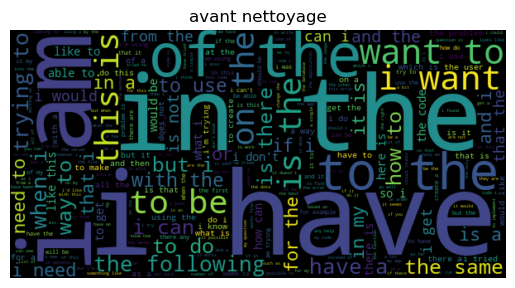

In [61]:
#plt.subplot(212)
plt.imshow(wordcloud_body_text, interpolation='bilinear')
plt.title("avant nettoyage",)
plt.axis("off")

In [56]:
df['Cleaned_text'] = df['Body_tokenized'].apply(lambda x: ' '.join(x))

In [58]:
wordcloud_cleaned_text = WordCloud(random_state = 8,
        normalize_plurals = False,
        width = 600, height= 300,
        max_words = 300,
        stopwords = [])

text_cleaned = ' '.join(df['Cleaned_text'])
# Apply the wordcloud to the text.
wordcloud_cleaned_text.generate(text_cleaned)

(-0.5, 599.5, 299.5, -0.5)

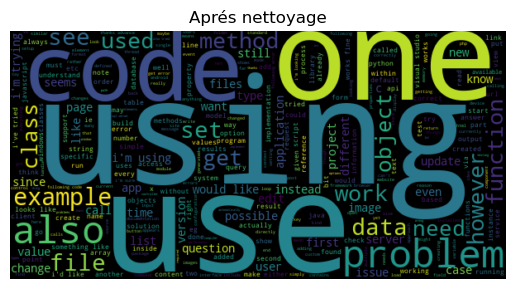

In [60]:
#plt.subplot(212)
plt.imshow(wordcloud_cleaned_text, interpolation='bilinear')
plt.title("Aprés nettoyage",)
plt.axis("off")

In [62]:
from wordcloud import WordCloud
wordcloud_tags = WordCloud(random_state = 8,
        normalize_plurals = False,
        width = 600, height= 300,
        max_words = 300,
        stopwords = [])

tags_ = ' '.join(df['Tags_cleaned'])
# Apply the wordcloud to the text.
wordcloud_tags.generate(tags_)

(-0.5, 599.5, 299.5, -0.5)

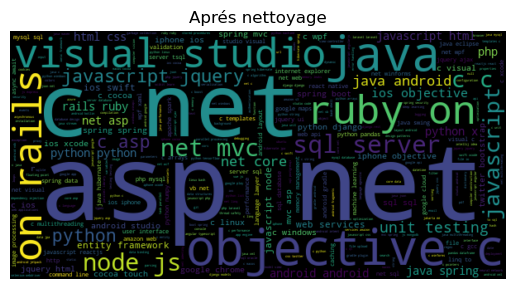

In [63]:
plt.imshow(wordcloud_tags, interpolation='bilinear')
plt.title("Aprés nettoyage",)
plt.axis("off")

In [110]:
df.head()

,Title,Body,Tags,Id,Score,ViewCount,AnswerCount,Body_cleaned,Tags_cleaned,lang,Tags_list,number_of_tags,Title_cleaned,Title_tokenized,Body_tokenized,Tags_tokenized,Cleaned_text
0,"When porting Java code to ObjC, how best to re...",<p>I am working on porting a Java codebase to ...,<java><objective-c><cocoa><macos><porting>,1117384,8,1346,6,i am working on porting a java codebase to coc...,java objective-c cocoa macos porting,en,"[java, objective-c, macos]",3,when porting java code to objc how best to rep...,"[porting, java, code, objc, best, represent, c...","[working, porting, java, codebase, cocoaobject...","[java, objective-c, cocoa, macos, porting]",working porting java codebase cocoaobjectivec ...
1,Is there a way for hiding some enum values for...,<p>I have <strong>enum</strong> lets say for e...,<c#><.net><winforms><windows-forms-designer><p...,59024032,8,2172,1,i have enum lets say for example and have two ...,c# .net winforms windows-forms-designer prope...,en,"[c#, .net]",2,is there a way for hiding some enum values for...,"[way, hiding, enum, values, specific, property...","[enum, lets, say, example, two, classes, prope...","[c#, .net, winforms, windows-forms-designer, p...",enum lets say example two classes property enu...
2,fixing words with spaces using a dictionary lo...,<p>I have extracted the list of sentences from...,<python><python-2.7><dictionary><nltk><text-se...,19675106,19,6507,7,i have extracted the list of sentences from a ...,python python-2.7 dictionary nltk text-segmen...,en,[python],1,fixing words with spaces using a dictionary lo...,"[fixing, words, spaces, using, dictionary, loo...","[extracted, list, sentences, document, preproc...","[python, python-2.7, dictionary, nltk, text-se...",extracted list sentences document preprocessin...
3,How to split a string at line breaks in python?,<p>I want to copy some tabular data from Excel...,<python><arrays><list><clipboard><pywin32>,21205074,6,7848,5,i want to copy some tabular data from excel in...,python arrays list clipboard pywin32,en,"[python, arrays]",2,how to split a string at line breaks in python,"[split, string, line, breaks, python]","[want, copy, tabular, data, excel, python, arr...","[python, arrays, list, clipboard, pywin32]",want copy tabular data excel python array user...
4,How do you express binary literals in Python?,<p>How do you express an integer as a binary n...,<python><syntax><binary><integer><literals>,1476,394,317942,8,how do you express an integer as a binary numb...,python syntax binary integer literals,en,[python],1,how do you express binary literals in python,"[express, binary, literals, python]","[express, integer, binary, number, python, lit...","[python, syntax, binary, integer, literals]",express integer binary number python literals ...


In [34]:
data= data.reset_index()
data = data.drop('index', axis=1)
data.to_feather("cleaned_data_stackoverflow_questions.feather")